<a href="https://colab.research.google.com/github/farshid101/Deep-learning-Practice-/blob/main/DP_practices_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import tensorflow

In [1]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [2]:
import datetime

print(datetime.datetime.now())

2023-06-21 18:11:19.338678


# import Datasets

In [3]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")


11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train , y_train ) ,( x_test , y_test ) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train[0] , y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [6]:
x_train.shape , x_train.ndim , y_train.shape , y_train.ndim

((60000, 28, 28), 3, (60000,), 1)

# Finding label values


In [7]:
import numpy as np


label_values = np.unique(y_train)

label_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Draw the datasets

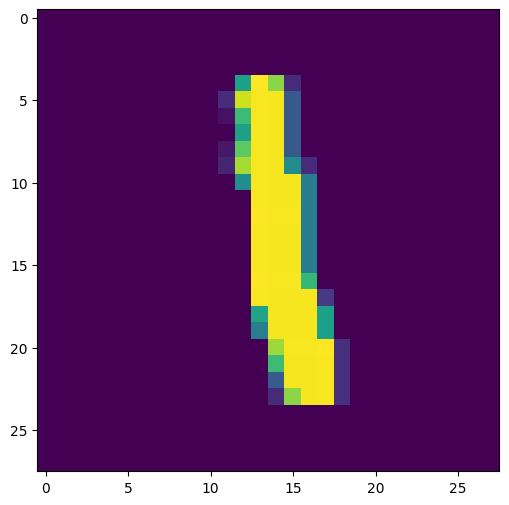

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(x_train[6])
plt.show()

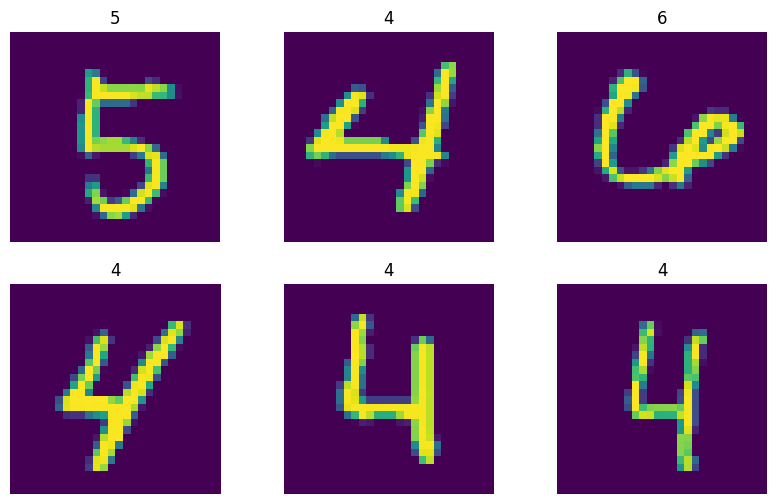

In [9]:
import random

plt.figure(figsize=(10,6))
for i in range(6):
  ax=plt.subplot(2 ,3 ,i+1 )
  n =random.choice(range(len(x_train)))
  plt.imshow(x_train[n])
  plt.title( y_train[n])
  plt.axis(False)

# Creating Model

###This is a Multiclass Classification Problem
### Because The label has multiple value



In [10]:
len(label_values)

10

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
#input shape
28*28

784

# The Model

In [13]:
tf.random.set_seed(42)


#Create model

model_1 =tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=( 28,28 ) ),
    tf.keras.layers.Dense(10 , activation="relu")  ,
    tf.keras.layers.Dense(10 , activation="relu") ,

    tf.keras.layers.Dense(10 ,activation="softmax")


])

#Create Compiler

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam() ,
    metrics="accuracy"

)

history_1 =model_1.fit(x_train , y_train , epochs=15 , validation_data=(x_test , y_test) )



Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2168 - accuracy: 0.2786 - val_loss: 1.6332 - val_accuracy: 0.3381
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4752 - accuracy: 0.3971 - val_loss: 1.3368 - val_accuracy: 0.4450
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2532 - accuracy: 0.4904 - val_loss: 1.1159 - val_accuracy: 0.5516
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0350 - accuracy: 0.5901 - val_loss: 0.9266 - val_accuracy: 0.6384
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8655 - accuracy: 0.6633 - val_loss: 0.8152 - val_accuracy: 0.6819
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7984 - accuracy: 0.6931 - val_loss: 0.7771 - val_accuracy: 0.7092
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7172 - accuracy: 0.7558 - val_loss: 0.7525 - val_accuracy:

In [14]:
model_1.evaluate(x_train , y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4700 - accuracy: 0.8615


[0.4700390696525574, 0.8615333437919617]

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [16]:
import matplotlib.pyplot as plt
def view(x,y,i):
  plt.figure(figsize=(10,6))
  plt.imshow(x[i])
  plt.title(f"Image = {y[i]} ")
  plt.show()

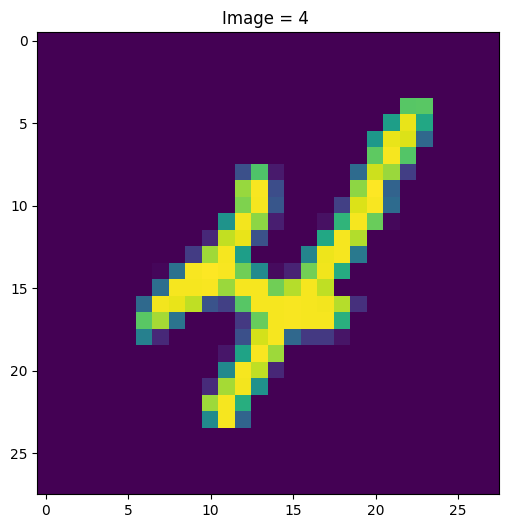

In [17]:
view(x_train,y_train ,9)

In [18]:
def pre(model, x , y ,i ):
  y_pred = model.predict(x[i].reshape(1,28,28))

  #y_pred = model_1.predict(x_test[9].reshape(1, 28,28))
  #y_pred.max()
  #y_pred.argmax()

  print(
     f" Y predict value is = { y_pred.argmax()  }  \n Y Ture value is { y[i] } "
  )
  if(y_pred.argmax()==y[i]):
    print("\n Success Prediction  , Yessss")
  else:
    print("\n Failed  Prediction , Noooo")





In [19]:
len(x_test)

10000

In [20]:
pre(model_1 ,x_test ,y_test ,1842 )

1/1 [==============================] - 0s 61ms/step
 Y predict value is = 2  
 Y Ture value is 2 

 Success Prediction  , Yessss


# Improving Model

In [21]:
tf.random.set_seed(42)



model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,

    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(80 ,activation="tanh") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu" ),

    tf.keras.layers.Dense(10 ,activation="softmax")

])


model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics="accuracy"
)


history_2=model_2.fit(x_train ,y_train , epochs=40 , validation_data=(x_test , y_test ))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7883 - accuracy: 0.7422 - val_loss: 0.6132 - val_accuracy: 0.7948
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5949 - accuracy: 0.8069 - val_loss: 0.5795 - val_accuracy: 0.8088
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5133 - accuracy: 0.8374 - val_loss: 0.4727 - val_accuracy: 0.8507
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4870 - accuracy: 0.8420 - val_loss: 0.4599 - val_accuracy: 0.8483
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4396 - accuracy: 0.8603 - val_loss: 0.4099 - val_accuracy: 0.8706
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4070 - accuracy: 0.8715 - val_loss: 0.4254 - val_accuracy: 0.8684
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4617 - accuracy: 0.8526 - val_loss: 0.4001 - val_accuracy:

# Comparing model one and model two

<Figure size 500x500 with 0 Axes>

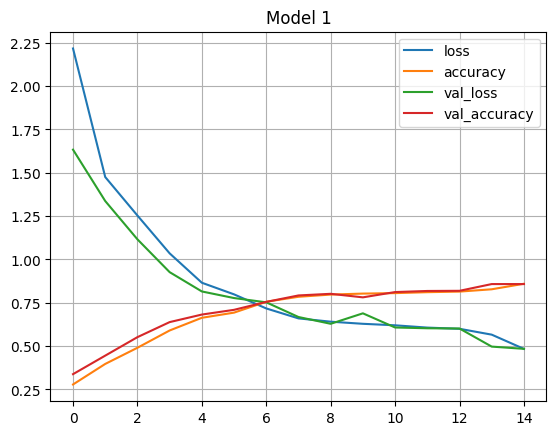

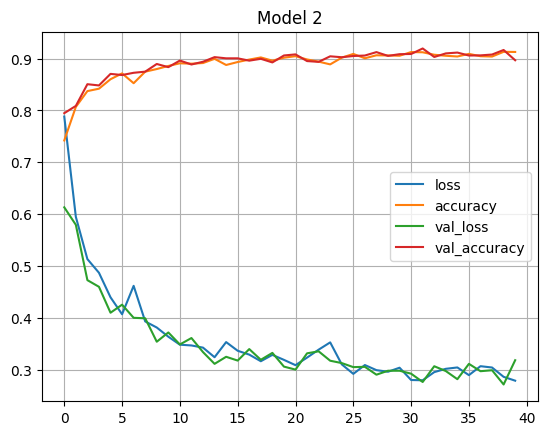

In [22]:

import pandas as pd

plt.figure(figsize=(5,5))

pd.DataFrame(history_1.history).plot(title="Model 1").grid()

pd.DataFrame(history_2.history).plot(title="Model 2").grid();

# Imporving Model more

In [23]:
tf.random.set_seed(42)



model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,

    tf.keras.layers.Dense(100 , activation="tanh"),
    tf.keras.layers.Dense(90 ,activation="relu") ,
    tf.keras.layers.Dense(80 ,activation="relu") ,
    tf.keras.layers.Dense(70 ,activation="relu") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(30 ,activation="relu") ,
    tf.keras.layers.Dense(25 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu" ),
    tf.keras.layers.Dense(15 ,activation="relu" ),

    tf.keras.layers.Dense(10 ,activation="softmax")

])


model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics="accuracy"
)


history_3=model_3.fit(x_train ,y_train , epochs=40 , validation_data=(x_test , y_test ))

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8524 - accuracy: 0.7126 - val_loss: 0.5554 - val_accuracy: 0.8203
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5296 - accuracy: 0.8301 - val_loss: 0.5206 - val_accuracy: 0.8335
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4687 - accuracy: 0.8482 - val_loss: 0.4167 - val_accuracy: 0.8678
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4185 - accuracy: 0.8669 - val_loss: 0.4516 - val_accuracy: 0.8532
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4081 - accuracy: 0.8709 - val_loss: 0.3668 - val_accuracy: 0.8835
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3707 - accuracy: 0.8824 - val_loss: 0.3493 - val_accuracy: 0.8910
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3465 - accuracy: 0.8908 - val_loss: 0.3587 - val_accuracy:

# With same epochs But different layers Comparing

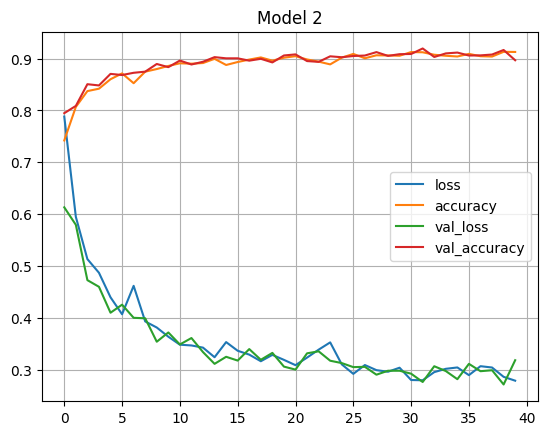

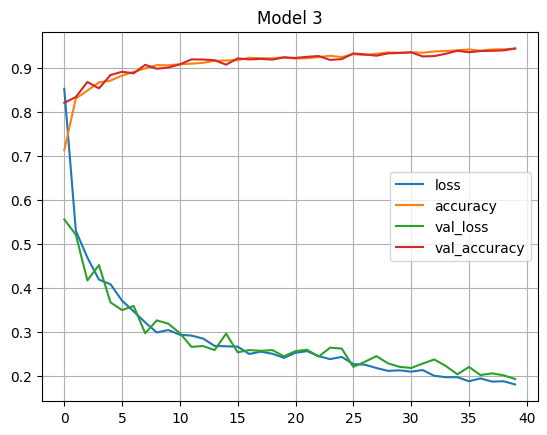

In [24]:

import pandas as pd



pd.DataFrame(history_2.history).plot(title="Model 2").grid()

pd.DataFrame(history_3.history).plot(title="Model 3").grid();

In [25]:
tf.random.set_seed(42)



model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,

    tf.keras.layers.Dense(400 , activation="relu"),
    tf.keras.layers.Dense(300 , activation="relu"),
    tf.keras.layers.Dense(200 , activation="relu"),
    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(90 ,activation="relu") ,
    tf.keras.layers.Dense(85 ,activation="relu") ,
    tf.keras.layers.Dense(80 ,activation="relu") ,
    tf.keras.layers.Dense(70 ,activation="relu") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(30 ,activation="relu") ,
    tf.keras.layers.Dense(25 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu" ),
    tf.keras.layers.Dense(15 ,activation="relu" ),

    tf.keras.layers.Dense(10 ,activation="softmax")

])


model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics="accuracy"
)


history_4=model_4.fit(x_train ,y_train , epochs=40 , validation_data=(x_test , y_test ))

Epoch 1/40
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4768 - accuracy: 0.8575 - val_loss: 0.2504 - val_accuracy: 0.9409
Epoch 2/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1858 - accuracy: 0.9546 - val_loss: 0.2069 - val_accuracy: 0.9542
Epoch 3/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1460 - accuracy: 0.9655 - val_loss: 0.1237 - val_accuracy: 0.9712
Epoch 4/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1240 - accuracy: 0.9701 - val_loss: 0.1731 - val_accuracy: 0.9613
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1069 - accuracy: 0.9748 - val_loss: 0.1181 - val_accuracy: 0.9693
Epoch 6/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0966 - accuracy: 0.9777 - val_loss: 0.1482 - val_accuracy: 0.9707
Epoch 7/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0862 - accuracy: 0.9811 - val_loss: 0.1186 - val_ac

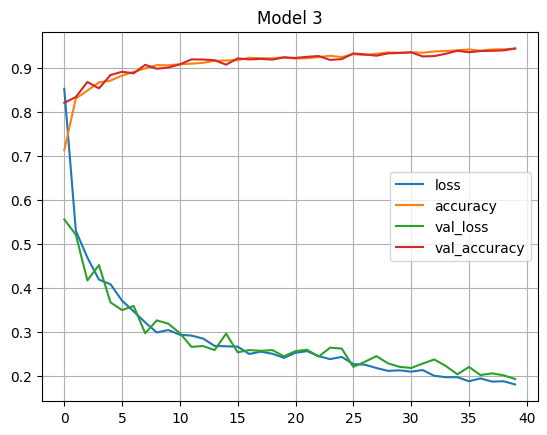

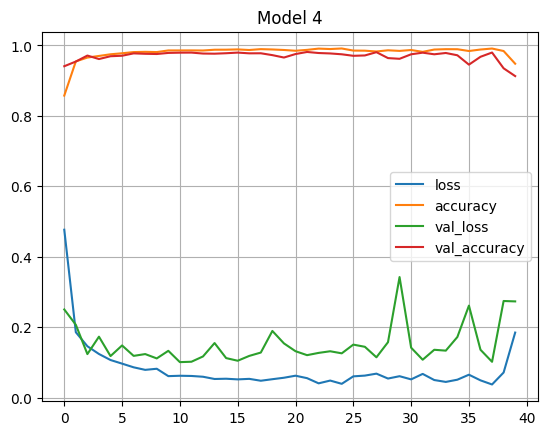

In [26]:
import pandas as pd



pd.DataFrame(history_3.history).plot(title="Model 3").grid()

pd.DataFrame(history_4.history).plot(title="Model 4").grid();

In [31]:
#model 4
pre(model_4 ,x_test ,y_test ,5457
)

1/1 [==============================] - 0s 16ms/step
 Y predict value is = 8  
 Y Ture value is 1 

 Failed  Prediction , Noooo


In [28]:
#mdoel 3
pre(model_3 ,x_test ,y_test ,5457)

1/1 [==============================] - 0s 78ms/step
 Y predict value is = 8  
 Y Ture value is 1 

 Failed  Prediction , Noooo


### This image has noise

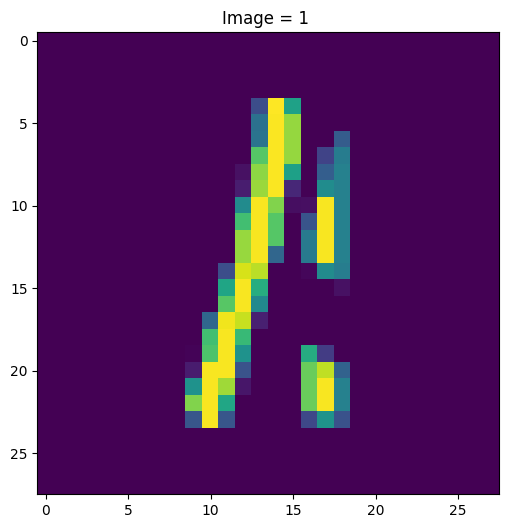

In [29]:
view(x_test,y_test ,5457)

# Checking the model

1/1 [==============================] - 0s 20ms/step
 Y predict value is = 8  
 Y Ture value is 8 

 Success Prediction  , Yessss
None
index is 3002


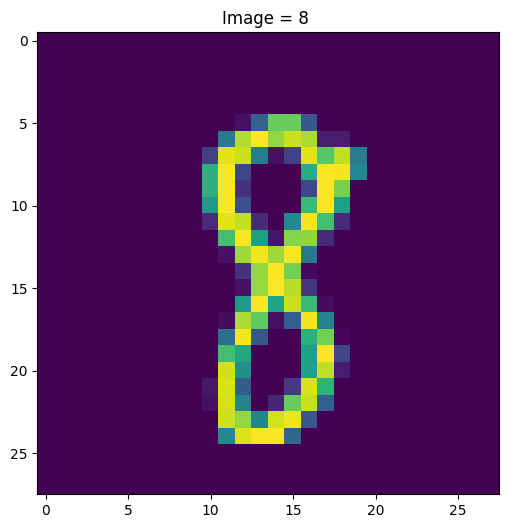

In [30]:
n =random.choice(range(len(x_test)))
print(pre(model_4 ,x_test ,y_test ,n) )
print(f"index is {n}")
view(x_test,y_test ,n)

# Making a Function to find fail prediction's index number

In [61]:
def find_mistake(model, x , y  ):
  ok=0
  not_ok=0
  index_number =[]
  for i in range(len(x)):
      y_pred = model.predict(x[i].reshape(1,28,28))
      if(y_pred.argmax()==y[i] ):
          ok=ok+1
      else:
        index_number.append(i)
        not_ok=not_ok+1
  print( f"\n success Rate : { (ok/len(x))*100 } % ")
  print(f"\n Not success Rate : { (not_ok/len(x))*100 } % ")
  print("\n\n Not success values index number : \n ")
  print(index_number)


In [60]:
find_mistake(model_4 ,x_test[5440:5460] ,y_test[5440:5460])

1/1 [==============================] - 0s 18ms/step

 success Rate : 85.0 % 

 Not success Rate : 15.0 % 


 Not success values index number : 
 
[9, 15, 17]


In [90]:
def find_mistake(model, x , y  ):
  ok=0
  not_ok=0
  index_number =[]
  for i in range(len(x)):
      y_pred = model.predict(x[i].reshape(1,28,28))
      if(y_pred.argmax()==y[i] ):
          ok=ok+1
      else:
        index_number.append(i+5440)
        not_ok=not_ok+1
  print( f"\n success Rate : { (ok/len(x))*100 } % ")
  print(f"\n Not success Rate : { (not_ok/len(x))*100 } % ")
  print("\n\n Not success values index number : \n ")
  print(index_number)


In [100]:
find_mistake(model_4 ,x_test[5440:5460] ,y_test[5440:5460])

1/1 [==============================] - 0s 15ms/step

 success Rate : 85.0 % 

 Not success Rate : 15.0 % 


 Not success values index number : 
 
[5449, 5455, 5457]


In [107]:
mistake_list=[5455]

def random_mistake(m_list):
  n =random.choice(range(len(m_list)))
  print(pre(model_4 ,x_test ,y_test , n) )
  print(f"index is {n}")
  view(x_test,y_test ,n)



1/1 [==============================] - 0s 17ms/step
 Y predict value is = 7  
 Y Ture value is 7 

 Success Prediction  , Yessss
None
index is 0


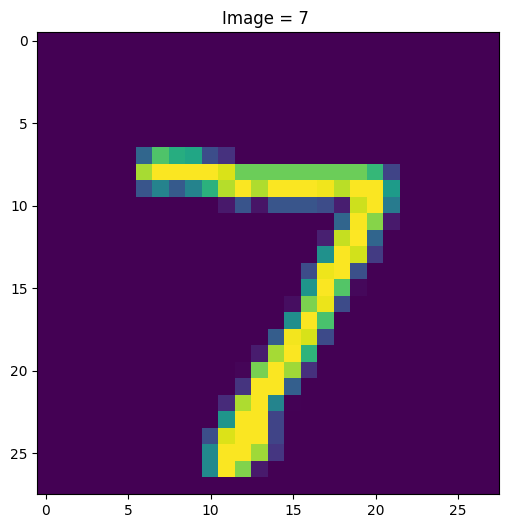

In [108]:
random_mistake(mistake_list)